In [179]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')
df_train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [181]:
del df_train['passengerid']

In [182]:
df_train.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [183]:
df_train['cabin'] = df_train['cabin'].fillna('unknown')
df_train['embarked'] = df_train['embarked'].fillna('unknown')

In [184]:
global_survivorship = df_train['survived'].mean()
global_survivorship

np.float64(0.3838383838383838)

In [185]:
pclass_values = {
    1: 'upper',
    2: 'middle',
    3: 'lower'
}
df_train['pclass'] = df_train.pclass.map(pclass_values)

df_train['cabin_deck'] = df_train['cabin'].str[0]

In [186]:
df_train.groupby('cabin').size().sort_values()

cabin
A10              1
A14              1
A16              1
A19              1
A20              1
              ... 
D                3
B96 B98          4
C23 C25 C27      4
G6               4
unknown        687
Length: 148, dtype: int64

In [187]:
numerical_features = ['age', 'sibsp', 'parch',]
categorical_features = ['pclass', 'sex', 'embarked', 'cabin', 'cabin_deck']

In [188]:
for column in df_train.columns:
    print(df_train[column].value_counts())
    print()

survived
0    549
1    342
Name: count, dtype: int64

pclass
lower     491
upper     216
middle    184
Name: count, dtype: int64

name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64

sex
male      577
female    314
Name: count, dtype: int64

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Nam

In [189]:
df_train[df_train['embarked'].isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_deck


In [190]:
df_train[df_train['cabin'].isna()]['pclass'].value_counts()

Series([], Name: count, dtype: int64)

# Survivor rate

In [191]:
# If survior ratio is greater than 1, the category is more likely to survive, and if the ratio is lower than 1,the category is less likely to survive.

for c in categorical_features:
    print(c)
    df_group = df_train.groupby(c).survived.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_survivorship
    df_group['survive_ratio'] = df_group['mean'] / global_survivorship
    display(df_group)
    print()
    print()

pclass


,mean,count,diff,survive_ratio
pclass,,,,
lower,0.242363,491,-0.141476,0.631418
middle,0.472826,184,0.088988,1.231836
upper,0.629630,216,0.245791,1.640351




sex


,mean,count,diff,survive_ratio
sex,,,,
female,0.742038,314,0.35820,1.933205
male,0.188908,577,-0.19493,0.492155




embarked


,mean,count,diff,survive_ratio
embarked,,,,
C,0.553571,168,0.169733,1.442199
Q,0.389610,77,0.005772,1.015038
S,0.336957,644,-0.046882,0.877860
unknown,1.000000,2,0.616162,2.605263




cabin


,mean,count,diff,survive_ratio
cabin,,,,
A10,0.000000,1,-0.383838,0.000000
A14,0.000000,1,-0.383838,0.000000
A16,1.000000,1,0.616162,2.605263
A19,0.000000,1,-0.383838,0.000000
A20,1.000000,1,0.616162,2.605263
...,...,...,...,...
F38,0.000000,1,-0.383838,0.000000
F4,1.000000,2,0.616162,2.605263
G6,0.500000,4,0.116162,1.302632




cabin_deck


,mean,count,diff,survive_ratio
cabin_deck,,,,
A,0.466667,15,0.082828,1.215789
B,0.744681,47,0.360842,1.940090
C,0.593220,59,0.209382,1.545495
D,0.757576,33,0.373737,1.973684
E,0.750000,32,0.366162,1.953947
F,0.615385,13,0.231546,1.603239
G,0.500000,4,0.116162,1.302632
T,0.000000,1,-0.383838,0.000000
u,0.299854,687,-0.083984,0.781200


# Mutual information

In [192]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train.survived)

In [193]:
mi = df_train[categorical_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

cabin         0.165236
sex           0.150870
pclass        0.058107
cabin_deck    0.055122
embarked      0.016668
dtype: float64

# Feature importance: Correlation

In [194]:
df_train[numerical_features].corrwith(df_train.survived).abs()

age      0.077221
sibsp    0.035322
parch    0.081629
dtype: float64

## Kids

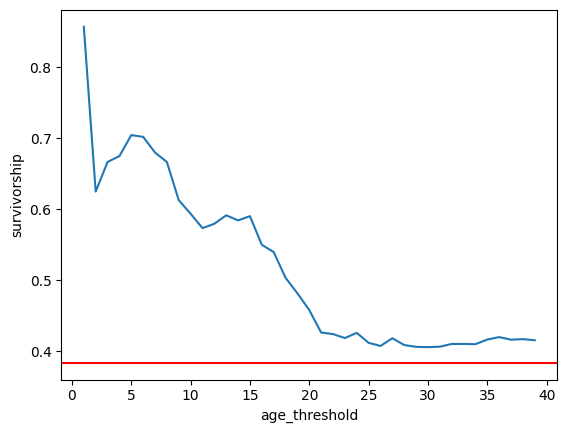

In [204]:
kids_score = []
for kid_age_threshold in range(1, 40):
    kids_score.append((df_train[df_train.age <= kid_age_threshold].survived.mean(), kid_age_threshold))
df_kids = pd.DataFrame(kids_score, columns=['survivorship', 'age_threshold'])

plt.xlabel('age_threshold')
plt.ylabel('survivorship')
plt.axhline(y=global_survivorship, label='sadasdasddf', c='red')
plt.plot(df_kids['age_threshold'], df_kids['survivorship'])

In [214]:
print(df_train[df_train.age <= 2].survived.mean())
print(df_train[(df_train.age >= 2) & (df_train.age <= 9)].survived.mean())
print(df_train[(df_train.age >=8) & (df_train.age >= 16)].survived.mean())

0.625
0.5416666666666666
0.38193343898573695
